In [1]:
import sys
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

msg_format = "%(asctime)s|%(levelname)s|%(filename)s:%(lineno)d| %(message)s"
date_format = "%d-%b-%y %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=msg_format, datefmt=date_format, stream=sys.stdout)

pwd = os.getcwd()
module_path = f"{pwd}\..\src"
sys.path.insert(0, module_path)

from datetime import datetime, timedelta
from hostelprices.scrape_web import ScrapeWeb
from hostelprices.utils import Utils, Defs 
from hostelprices.database import Database
from hostelprices.analysis import HostelDF

%load_ext autoreload
%autoreload 2

In [2]:
client_id = Utils.fromConfig('mongo_client')
data_base_name = Utils.fromConfig('data_base_name')
collection_name = "main_coll--main-12_30_2022-08_22"

DB = Database(
    client_id=client_id, data_base_name=data_base_name#, collection_name=collection_name
    )
DB.filterCollections(contains='-main-')#'-main-'

In [3]:
df_all = DB.getPandasDf()
df_all

,_id,price (EUR),rating,distance (km),city,date_from,duration (days),request_time,collection,collection time,date from,request time
0,639b3a91263daf73fcc83118,3.420000,6.4,1.2,Lisbon,2023-02-13,2,2022-12-15 15:17:36.889,main_coll-main-12_15_2022-15_16,2022-12-15 15:16:00,NaT,NaT
0,639b240bd81841df1dd037b9,32.866936,8.0,0.5,Lisbon,2023-02-13,2,2022-12-15 13:41:30.764,main_coll-main-12_15_2022-13_40,2022-12-15 13:40:00,NaT,NaT
0,63abff2f61c4c13e1621d7dd,29.179217,9.7,0.5,Lisbon,2023-01-13,1,2022-12-28 08:24:16.305,main_coll-main-12_28_2022-08_23,2022-12-28 08:23:00,NaT,NaT
0,63b1ec9cf041739e3f323c7b,29.064317,9.7,0.5,Lisbon,NaT,1,NaT,main_coll-default-main-01_01_2023-20_18,2023-01-01 20:18:00,2023-01-13,2023-01-01 20:19:39.939
0,639b3fc6e9f8138f4e5356c0,18.781106,9.3,1.3,Lisbon,2023-02-13,2,2022-12-15 15:39:49.848,main_coll-main-12_15_2022-15_38,2022-12-15 15:38:00,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
227,63aaad48be5fc4ebfe046b3c,14.121634,7.8,1.0,Seville,2023-01-13,5,2022-12-27 08:29:30.725,main_coll-main-12_27_2022-08_23,2022-12-27 08:23:00,NaT,NaT
227,63ab54fb01900892c026197b,2.490000,9.1,1.1,Seville,2023-01-17,5,2022-12-27 20:26:24.836,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00,NaT,NaT
228,63ab54fb01900892c026197c,17.887404,7.8,1.2,Seville,2023-01-17,5,2022-12-27 20:26:24.836,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00,NaT,NaT
229,63ab54fb01900892c026197d,15.063077,4.0,1.6,Seville,2023-01-17,5,2022-12-27 20:26:24.836,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00,NaT,NaT


In [16]:
hdf = HostelDF(df_all)
hdf

,_id,price (EUR),rating,distance (km),city,duration (days),collection,collection time,date from,request time,days before,rating per price
0,639b3a91263daf73fcc83118,3.420000,6.4,1.2,Lisbon,2,main_coll-main-12_15_2022-15_16,2022-12-15 15:16:00,2023-02-13,2022-12-15 15:17:36.889,59.363889,1.871345
0,639b240bd81841df1dd037b9,32.866936,8.0,0.5,Lisbon,2,main_coll-main-12_15_2022-13_40,2022-12-15 13:40:00,2023-02-13,2022-12-15 13:41:30.764,59.430556,0.243406
0,63abff2f61c4c13e1621d7dd,29.179217,9.7,0.5,Lisbon,1,main_coll-main-12_28_2022-08_23,2022-12-28 08:23:00,2023-01-13,2022-12-28 08:24:16.305,15.650694,0.332428
0,63b1ec9cf041739e3f323c7b,29.064317,9.7,0.5,Lisbon,1,main_coll-default-main-01_01_2023-20_18,2023-01-01 20:18:00,2023-01-13,2023-01-01 20:19:39.939,11.154167,0.333743
0,639b3fc6e9f8138f4e5356c0,18.781106,9.3,1.3,Lisbon,2,main_coll-main-12_15_2022-15_38,2022-12-15 15:38:00,2023-02-13,2022-12-15 15:39:49.848,59.348611,0.495179
...,...,...,...,...,...,...,...,...,...,...,...,...
227,63aaad48be5fc4ebfe046b3c,14.121634,7.8,1.0,Seville,5,main_coll-main-12_27_2022-08_23,2022-12-27 08:23:00,2023-01-13,2022-12-27 08:29:30.725,16.650694,0.552344
227,63ab54fb01900892c026197b,2.490000,9.1,1.1,Seville,5,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00,2023-01-17,2022-12-27 20:26:24.836,20.153472,3.654618
228,63ab54fb01900892c026197c,17.887404,7.8,1.2,Seville,5,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00,2023-01-17,2022-12-27 20:26:24.836,20.153472,0.436061
229,63ab54fb01900892c026197d,15.063077,4.0,1.6,Seville,5,main_coll-main-12_27_2022-20_19,2022-12-27 20:19:00,2023-01-17,2022-12-27 20:26:24.836,20.153472,0.265550


In [7]:
print(hdf.city.value_counts())
print(hdf["collection time"].value_counts())
print(hdf[Defs.colName('date_from')].value_counts())
print(hdf[Defs.colName('time_before')].value_counts())
print(hdf[Defs.colName('duration')].value_counts())

Lisbon     4537
Seville    1840
Name: city, dtype: int64
2022-12-27 20:19:00    231
2022-12-28 08:23:00    228
2022-12-27 08:23:00    228
2022-12-31 08:22:00    228
2022-12-26 08:23:00    227
                      ... 
2022-12-15 19:36:00     28
2022-12-16 06:18:00     28
2022-12-15 13:40:00     28
2022-12-21 08:24:00     28
2022-12-15 18:17:00     28
Name: collection time, Length: 68, dtype: int64
2023-01-17 00:00:00.000    2396
2023-01-13 00:00:00.000    2293
2023-02-13 00:00:00.000    1260
2022-12-30 15:16:40.160     112
2022-12-29 15:16:40.160     110
2022-12-30 15:16:39.063     106
2022-12-31 15:16:39.063     100
Name: date from, dtype: int64
20.650694    227
20.153472    226
21.650694    117
23.651389    116
24.650694    116
            ... 
57.651389     28
58.950000     28
58.153472     28
59.200000     28
58.722917     28
Name: days before, Length: 89, dtype: int64
5    2663
1    2454
2    1260
Name: duration (days), dtype: int64


In [17]:
hdf_sel = hdf.filter(
    (hdf[Defs.colName('city')]=='Lisbon') & (hdf[Defs.colName('date_from')]=='2023-01-13') & \
    (hdf[Defs.colName('distance')]<10) & (hdf[Defs.colName('rating')]>5) 
    #& (hdf[Defs.colName('duration')]==5)
    )
len(hdf_sel)

1456

In [18]:
hdf_sel["collection time"].value_counts().index

DatetimeIndex(['2022-12-31 08:22:00', '2022-12-30 20:19:00',
               '2022-12-28 08:23:00', '2023-01-02 20:18:00',
               '2023-01-01 20:18:00', '2022-12-28 20:19:00',
               '2022-12-27 20:19:00', '2022-12-30 08:22:00',
               '2023-01-02 08:24:00', '2022-12-26 08:23:00',
               '2022-12-27 08:23:00', '2022-12-29 08:23:00',
               '2022-12-26 20:18:00', '2023-01-03 08:23:00',
               '2022-12-31 20:18:00', '2022-12-23 08:23:00',
               '2022-12-25 20:18:00', '2022-12-24 08:22:00',
               '2022-12-21 20:19:00', '2022-12-23 20:19:00',
               '2022-12-25 08:22:00'],
              dtype='datetime64[ns]', freq=None)

In [19]:
print(hdf_sel.city.value_counts())
print(hdf_sel["collection time"].value_counts())
print(hdf_sel[Defs.colName('date_from')].value_counts())
print(hdf_sel[Defs.colName('time_before')].value_counts())
print(hdf_sel[Defs.colName('duration')].value_counts())

Lisbon    1456
Name: city, dtype: int64
2022-12-31 08:22:00    72
2022-12-30 20:19:00    72
2022-12-28 08:23:00    71
2023-01-02 20:18:00    71
2023-01-01 20:18:00    71
2022-12-28 20:19:00    71
2022-12-27 20:19:00    71
2022-12-30 08:22:00    70
2023-01-02 08:24:00    70
2022-12-26 08:23:00    69
2022-12-27 08:23:00    69
2022-12-29 08:23:00    69
2022-12-26 20:18:00    69
2023-01-03 08:23:00    69
2022-12-31 20:18:00    68
2022-12-23 08:23:00    68
2022-12-25 20:18:00    68
2022-12-24 08:22:00    68
2022-12-21 20:19:00    67
2022-12-23 20:19:00    67
2022-12-25 08:22:00    66
Name: collection time, dtype: int64
2023-01-13    1456
Name: date from, dtype: int64
12.651389    72
13.153472    72
15.650694    71
10.154167    71
11.154167    71
15.153472    71
16.153472    71
13.651389    70
10.650000    70
17.650694    69
16.650694    69
14.650694    69
17.154167    69
9.650694     69
12.154167    68
20.650694    68
18.154167    68
19.651389    68
22.153472    67
20.153472    67
18.651389

c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


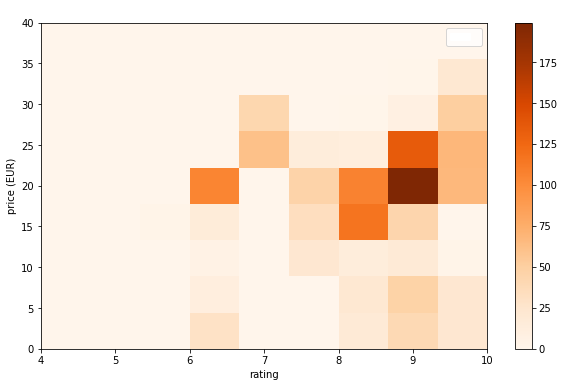

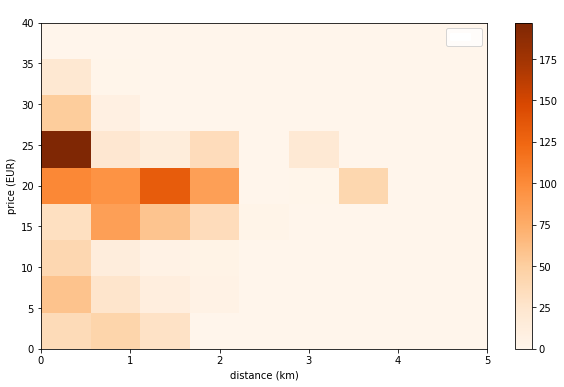

In [20]:
_ = hdf_sel.plot(
    x=Defs.colName('rating'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(4,10), ylim=(0,40), nbins=10
    )
_ = hdf_sel.plot(
    x=Defs.colName('distance'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(0,5), ylim=(0,40), nbins=10
    )

c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


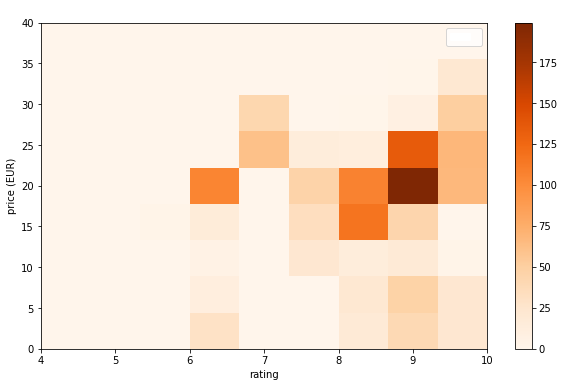

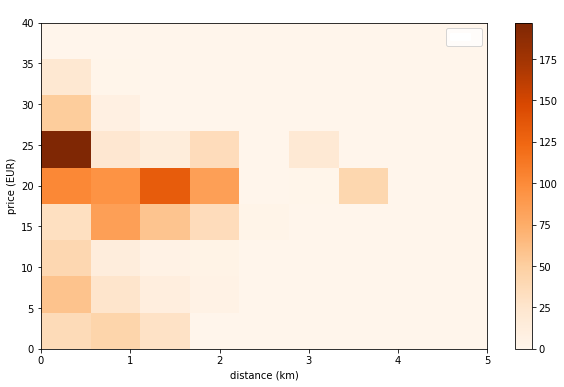

In [21]:
_ = hdf_sel.plot(
    x=Defs.colName('rating'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(4,10), ylim=(0,40), nbins=10
    )
_ = hdf_sel.plot(
    x=Defs.colName('distance'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(0,5), ylim=(0,40), nbins=10
    )

In [22]:
def processed_values_plot(axs, hdf, city='Lisbon', date_from='2023-01-13', max_dist=5, min_rating=5, duration=5, label=None):
    hdf_new = hdf.filter(
        (hdf[Defs.colName('city')]==city) & (hdf[Defs.colName('date_from')]==date_from) & \
        (hdf[Defs.colName('distance')]<max_dist) & (hdf[Defs.colName('rating')]>min_rating) & \
        (hdf[Defs.colName('duration')]==duration)
        )
    time_before, avg_price, n_hostels = hdf_new.cummulated()
    axs[0].plot(time_before, avg_price, label=label)
    axs[0].set_xlabel('days before')
    axs[0].set_ylabel('lowest price')
    axs[1].plot(time_before, n_hostels, label=label)
    axs[1].set_xlabel('days before')
    axs[1].set_ylabel('number of hostels')

C:\Users\fsgl1\AppData\Local\Temp\ipykernel_23984\2395793522.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


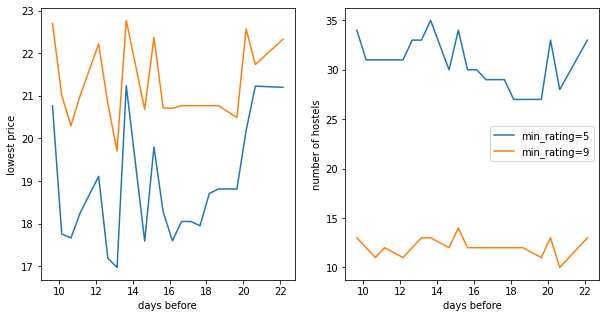

In [23]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
processed_values_plot(axs, hdf_sel, duration=5, label='min_rating=5')
processed_values_plot(axs, hdf_sel, duration=5, min_rating=9, label='min_rating=9')
plt.legend()
fig.show()

C:\Users\fsgl1\AppData\Local\Temp\ipykernel_23984\1579915061.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


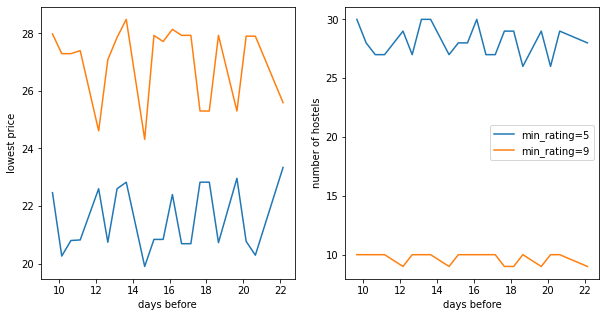

In [24]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
processed_values_plot(axs, hdf_sel, duration=1, label='min_rating=5')
processed_values_plot(axs, hdf_sel, duration=1, min_rating=9, label='min_rating=9')
plt.legend()
fig.show()